In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tabula
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_excel("manateesummary.xlsx")

In [3]:
df = df.dropna()

In [4]:
# pearson correlation
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,Year,Watercraft,Flood Gate/Canal Lock,Other Human,Perinatal,Cold Stress,Natural,Undetermined,Not Necropsied,Total
Year,1.000000,0.940268,0.040610,0.703163,0.943592,0.460159,0.655773,0.727903,0.448139,0.868552
Watercraft,0.940268,1.000000,0.041948,0.687721,0.866256,0.446361,0.601421,0.698802,0.372136,0.811331
Flood Gate/Canal Lock,0.040610,0.041948,1.000000,0.177085,0.001726,-0.261120,0.039006,-0.090633,0.101552,0.009692
Other Human,0.703163,0.687721,0.177085,1.000000,0.689295,0.217815,0.621828,0.479589,0.275517,0.628085
Perinatal,0.943592,0.866256,0.001726,0.689295,1.000000,0.466077,0.701346,0.757772,0.405065,0.866474
Cold Stress,0.460159,0.446361,-0.261120,0.217815,0.466077,1.000000,0.193675,0.671397,0.126702,0.552985
Natural,0.655773,0.601421,0.039006,0.621828,0.701346,0.193675,1.000000,0.570387,0.492189,0.809036
Undetermined,0.727903,0.698802,-0.090633,0.479589,0.757772,0.671397,0.570387,1.000000,0.099075,0.725603
Not Necropsied,0.448139,0.372136,0.101552,0.275517,0.405065,0.126702,0.492189,0.099075,1.000000,0.704624
Total,0.868552,0.811331,0.009692,0.628085,0.866474,0.552985,0.809036,0.725603,0.704624,1.000000


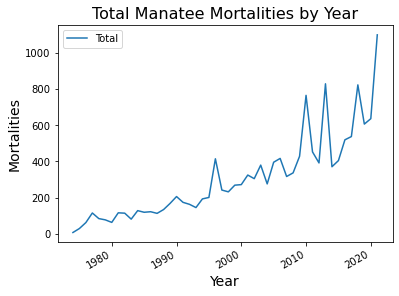

In [5]:
df.plot(x='Year', y = 'Total', kind='line')
plt.xticks(rotation=30, ha='right')

plt.ylabel('Mortalities', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Total Manatee Mortalities by Year', fontsize=16)

plt.show()

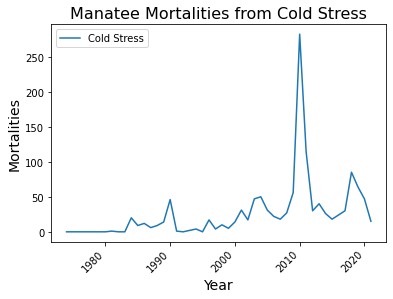

In [6]:
df.plot(x='Year', y = 'Cold Stress', kind = 'line')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Mortalities', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Manatee Mortalities from Cold Stress', fontsize=16)


plt.show()

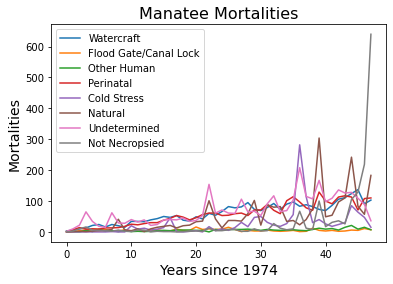

In [31]:

plt.plot(df['Watercraft'], label='Watercraft')
plt.plot(df['Flood Gate/Canal Lock'], label='Flood Gate/Canal Lock')
plt.plot(df['Other Human'], label='Other Human')
plt.plot(df['Perinatal'], label='Perinatal')
plt.plot(df['Cold Stress'], label='Cold Stress')
plt.plot(df['Natural'], label='Natural')
plt.plot(df['Undetermined'], label='Undetermined')
plt.plot(df['Not Necropsied'], label='Not Necropsied')

plt.legend()

plt.ylabel('Mortalities', fontsize=14)
plt.xlabel('Years since 1974', fontsize=14)
plt.title('Manatee Mortalities', fontsize=16)

plt.show()

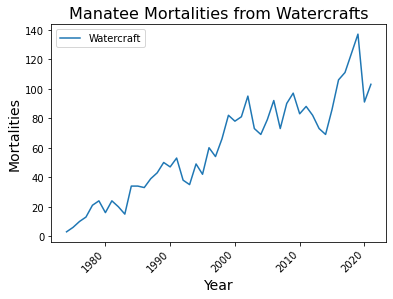

In [8]:
df.plot(x='Year', y = 'Watercraft', kind = 'line')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Mortalities', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Manatee Mortalities from Watercrafts', fontsize=16)


plt.show()

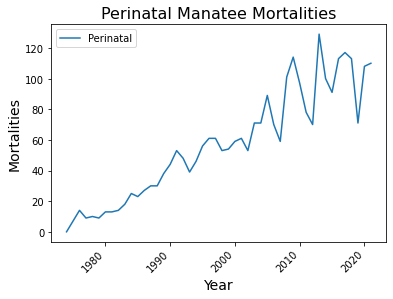

In [9]:
df.plot(x='Year', y = 'Perinatal', kind = 'line')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Mortalities', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Perinatal Manatee Mortalities', fontsize=16)


plt.show()

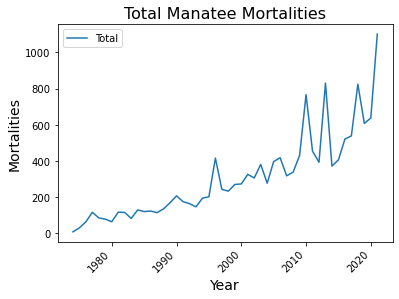

In [10]:
df.plot(x='Year', y = 'Total', kind = 'line')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Mortalities', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Total Manatee Mortalities', fontsize=16)


plt.show()

In [11]:
# table of full data from 2021 long-form data
file = "2021 manatee long.pdf"

table = tabula.read_pdf(file,pages=1)

print(table[0])

          County        Date  Field ID  Sex  Size              Waterway  \
0            NaN         NaN       NaN  NaN  (cm)                   NaN   
1   Hillsborough  01/01/2021  MNW21001    F   223         Old Tampa Bay   
2         Citrus  01/01/2021  MNW21002    M   239     Homosassa Springs   
3         Monroe  01/01/2021  MSE21001    F   120           Safe Harbor   
4        Brevard  01/02/2021  MEC21002    F   195          Indian River   
5        Brevard  01/02/2021  MEC21003    M   313          Indian River   
6      St. Johns  01/02/2021  MNE21001    U   200       St. Johns River   
7         Martin  01/02/2021  MSE21002    M   169             Peck Lake   
8     Palm Beach  01/02/2021  MSE21003    F   150     Lake Worth Lagoon   
9        Brevard  01/03/2021  MEC21004    F   200          Indian River   
10       Brevard  01/03/2021  MEC21006    U   125   St. Sebastian River   
11         Duval  01/03/2021  MNE21002    M   236          Ortega River   
12       Volusia  01/03/2

In [12]:
# linear regression model for watercraft mortalities
columnsWC = ['Year','Watercraft']
WC = df[columnsWC]

In [13]:
X = WC.iloc[:,:-1].values
y = WC.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test) 
y_pred

array([ 73.20523836,  14.50928492,  66.16172395,  75.5530765 ,
        80.24875277,  91.98794346,  84.94442905,  99.03145787,
        21.55279933,  28.59631375,  30.94415188,  77.90091463,
        82.59659091,  68.50956208, 115.46632483,   9.81360865])

In [17]:
y_test

array([ 73,  21,  78,  69,  92,  88,  90,  69,  24,  34,  34,  79,  73,
        81, 103,  10])

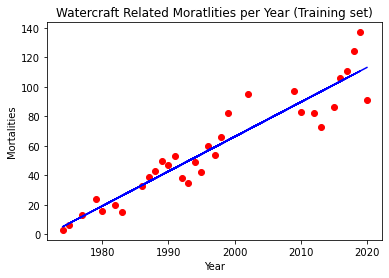

In [18]:
#plot for the TRAIN
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Watercraft Related Moratlities per Year (Training set)") # stating the title of the graph
 
plt.xlabel("Year") # adding the name of x-axis
plt.ylabel("Mortalities") # adding the name of y-axis
plt.show()

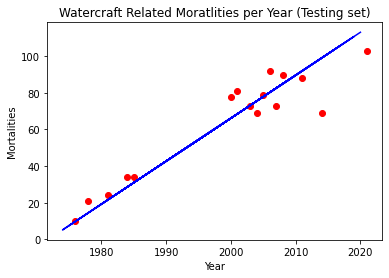

In [19]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Watercraft Related Moratlities per Year (Testing set)")
 
plt.xlabel("Year") 
plt.ylabel("Mortalities") 
plt.show() 

In [20]:
y_pred = regressor.predict(X_test) 

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

pred_df

,Actual,Predicted
0,73,73.205238
1,21,14.509285
2,78,66.161724
3,69,75.553076
4,92,80.248753
5,88,91.987943
6,90,84.944429
7,69,99.031458
8,24,21.552799
9,34,28.596314


In [21]:
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 7.66619318181796
Mean Squared Error: 109.74914162786564
Root Mean Squared Error: 10.476122451931614


In [22]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-4629.514550997783
[2.34783814]


In [23]:
# Linear Regression Model for Perinatal mortalities
columnsP = ['Year','Perinatal']
P = df[columnsP]

x = WC.iloc[:,:-1].values
Y = WC.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size=1/3,random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,Y_train)

Y_pred = regressor.predict(X_test) 
Y_pred

Y_test

array([ 73,  21,  78,  69,  92,  88,  90,  69,  24,  34,  34,  79,  73,
        81, 103,  10])

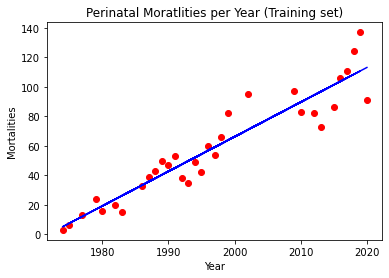

In [24]:
#plot for the TRAIN
 
plt.scatter(x_train, Y_train, color='red') # plotting the observation line
 
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
 
plt.title("Perinatal Moratlities per Year (Training set)") # stating the title of the graph
 
plt.xlabel("Year") # adding the name of x-axis
plt.ylabel("Mortalities") # adding the name of y-axis
plt.show()

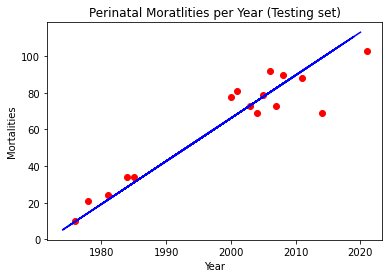

In [25]:
#plot for the TEST
 
plt.scatter(x_test, Y_test, color='red') 
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
 
plt.title("Perinatal Moratlities per Year (Testing set)")
 
plt.xlabel("Year") 
plt.ylabel("Mortalities") 
plt.show() 

In [26]:
Y_pred = regressor.predict(x_test) 

pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 

pred_df

,Actual,Predicted
0,73,73.205238
1,21,14.509285
2,78,66.161724
3,69,75.553076
4,92,80.248753
5,88,91.987943
6,90,84.944429
7,69,99.031458
8,24,21.552799
9,34,28.596314


In [27]:
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) 

Mean Absolute Error: 7.66619318181796
Mean Squared Error: 109.74914162786564
Root Mean Squared Error: 10.476122451931614


In [28]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-4629.514550997783
[2.34783814]


In [29]:
# R-squared linear regression Perinatal and Watercraft
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df[["Watercraft", "Perinatal"]], df.Year

#fit regression model
model.fit(X, y)

#calculate R-squared of regression model
r_squared = model.score(X, y)

#view R-squared value
print(r_squared)

0.950855931074588


In [38]:
from scipy.stats import linregress
x = [df.Year]
y = [df.Perinatal]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(r_value)

2.4083803734259663
0.9435918906454158


In [39]:
from scipy.stats import linregress
x = [df.Year]
y = [df.Watercraft]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(r_value)

2.2365935735996527
0.9402676732080311


In [40]:
from scipy.stats import linregress
x = [df.Year]
y = [df.Total]
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(r_value)

14.667716022579244
0.8685522058213331


In [41]:
# all r-squared values are above 0.8 therefore are significant